## Imports

In [1]:
from pvlib import pvsystem, modelchain, location
from pvlib.iotools import get_pvgis_tmy
import pandas as pd
import matplotlib.pyplot as plt

Read PVGIS TMY data

In [2]:
tmy_data, months_selected, inputs, metadata = get_pvgis_tmy(latitude=52.5, 
                                                            longitude=13.4, 
                                                            map_variables=True,
                                                            startyear=2005,
                                                            endyear=2016,
                                                            outputformat='json')

In [3]:
tmy_data.head()

,temp_air,relative_humidity,ghi,dni,dhi,IR(h),wind_speed,wind_direction,pressure
time(UTC),,,,,,,,,
2016-01-01 00:00:00+00:00,2.76,86.92,0.0,0.0,0.0,273.70,4.21,227.0,102055.0
2016-01-01 01:00:00+00:00,2.04,88.54,0.0,0.0,0.0,274.88,3.75,231.0,102065.0
2016-01-01 02:00:00+00:00,1.32,90.16,0.0,0.0,0.0,276.05,3.29,234.0,102075.0
2016-01-01 03:00:00+00:00,0.60,91.78,0.0,0.0,0.0,277.23,2.83,238.0,102065.0
2016-01-01 04:00:00+00:00,-0.11,93.40,0.0,0.0,0.0,278.41,2.38,242.0,102055.0


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

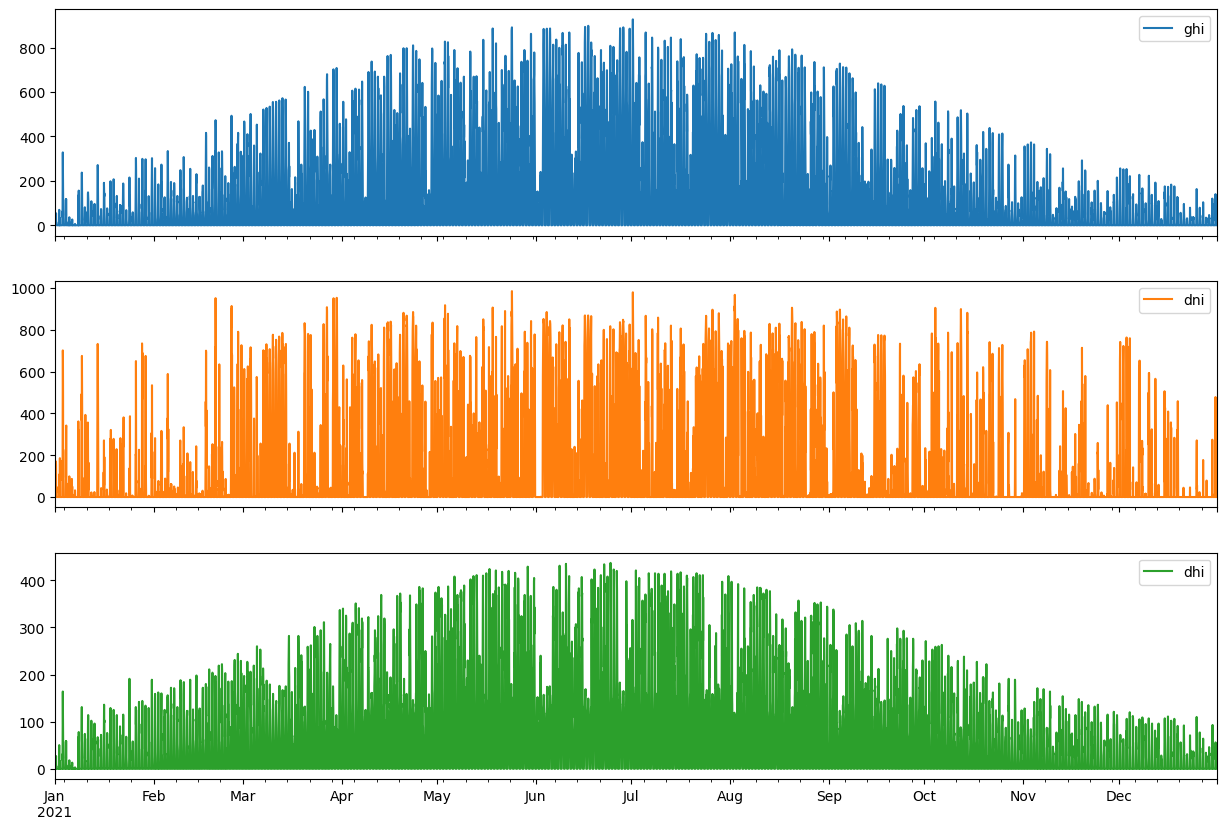

In [4]:
# plot TMY data
tmy_data.index = pd.date_range(start='2021-01-01 00:00', end='2021-12-31 23:00', freq='H')
tmy_data[['ghi', 'dni', 'dhi']].plot(subplots=True, figsize=(15, 10))

## Define system

In [6]:
loc = location.Location(latitude=52.5, longitude=13.4, tz='Europe/Berlin', altitude=0, name='Berlin')
sandia_modules = pvsystem.retrieve_sam('SandiaMod')
cec_inverters = pvsystem.retrieve_sam('CECInverter')

module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
inverter = cec_inverters['ABB__PVI_3_0_OUTD_S_US__208V_']

temperature_parameters = pvsystem.temperature.TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

system = pvsystem.PVSystem(surface_tilt=30, surface_azimuth=180,
                           module_parameters=module,
                           inverter_parameters=inverter,
                           temperature_model_parameters=temperature_parameters,
                           modules_per_string=7, strings_per_inverter=1)

mc = modelchain.ModelChain(system, loc)

## Run clear sky model

Text(0.5, 0, 'Month]')

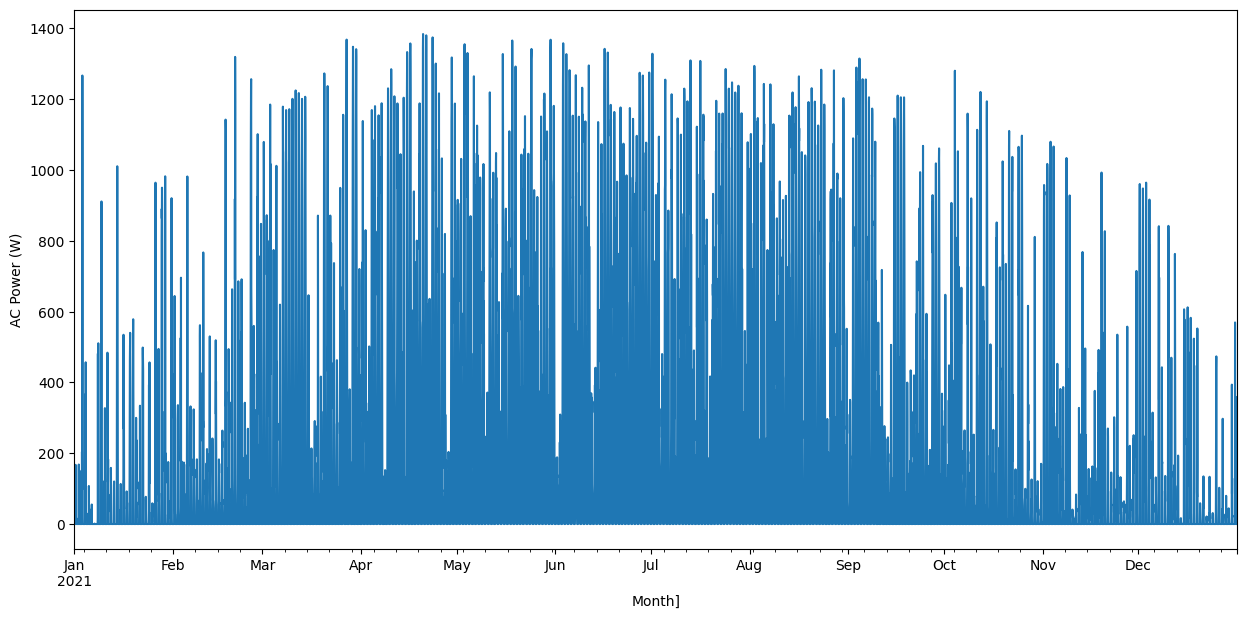

In [11]:
mc.run_model(tmy_data)
mc.results.ac.plot(figsize=(15, 7))
plt.ylabel('AC Power (W)')
plt.xlabel('Month]')